# Graphs depicting the blacklisting frequency of multiple liars infiltrating multiple clusters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#configs
distance = 100000
nbClusters = 2
nbLiars = 2
nbNodesRange = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
withSuspects = True


filename = "cluster_infiltration_N_" + str(nbNodesRange[0]) + "_to_" + \
    str(nbNodesRange[len(nbNodesRange)-1]) + "_with_" + str(nbClusters) +\
    "_clusters_" + str(nbLiars) + "_liars"

if withSuspects:
    filename += "_with_suspects"


In [3]:
data= pd.read_csv("data/" + filename + ".csv").drop_duplicates()

In [4]:
data[data["liar_caught"] == False][data["N"] == 12]

/home/sabrina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,N,c1,c2,liar_caught
120,12,4,8,False
140,12,3,9,False
160,12,2,10,False
161,12,10,2,False
180,12,1,11,False
181,12,11,1,False


In [5]:
data[["N", "liar_caught"]].groupby(["N", "liar_caught"]).size().unstack(fill_value=0).reset_index()

liar_caught,N,False,True
0,11,8,2
1,12,6,5
2,13,8,4
3,14,10,3
4,15,8,6
5,16,10,5
6,17,12,4
7,18,10,7
8,19,12,6
9,20,14,5


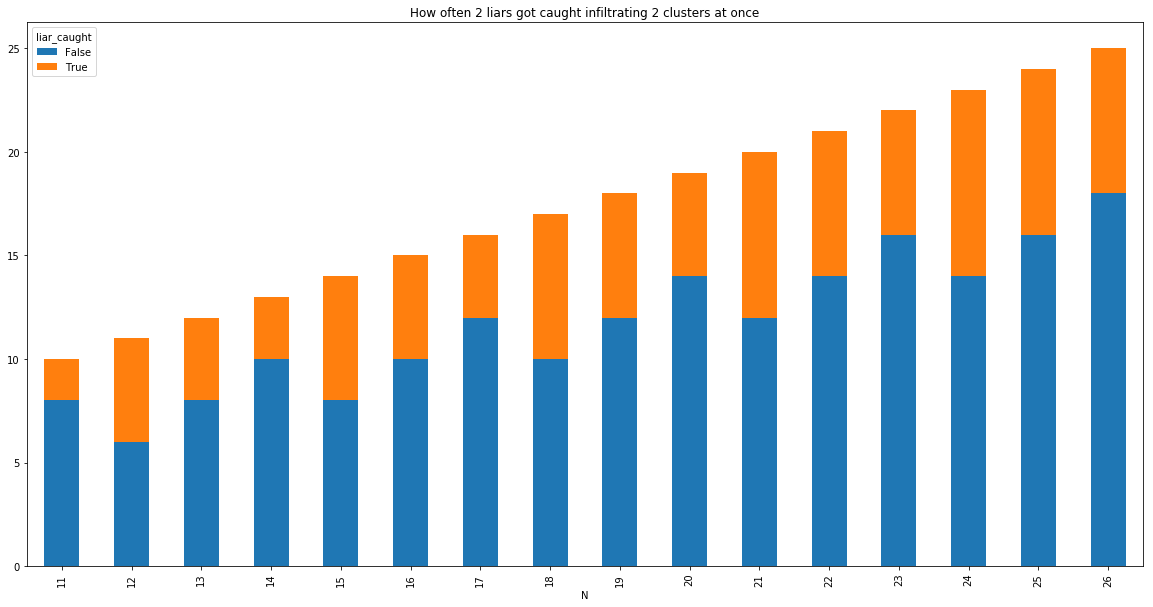

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
data[["N", "liar_caught"]].groupby(["N", "liar_caught"]).size().unstack(fill_value=0).reset_index()\
    .plot.bar(stacked=True, ax=ax, x="N", 
              title="How often "+str(nbLiars)+" liars got caught infiltrating "+str(nbClusters)+" clusters at once")

In [7]:
fig.savefig('graphs/blacklisting_percentages/'+filename+'.png')

In [8]:
data["imbalance"] = (data["c1"]/data["c2"]).round(3)
data[data["imbalance"] <= 1]

,N,c1,c2,liar_caught,imbalance
0,11,5,6,False,0.833
12,11,4,7,False,0.571
24,11,3,8,False,0.375
36,11,2,9,False,0.222
48,11,1,10,False,0.100
60,12,6,6,True,1.000
100,12,5,7,True,0.714
120,12,4,8,False,0.500
140,12,3,9,False,0.333
160,12,2,10,False,0.200


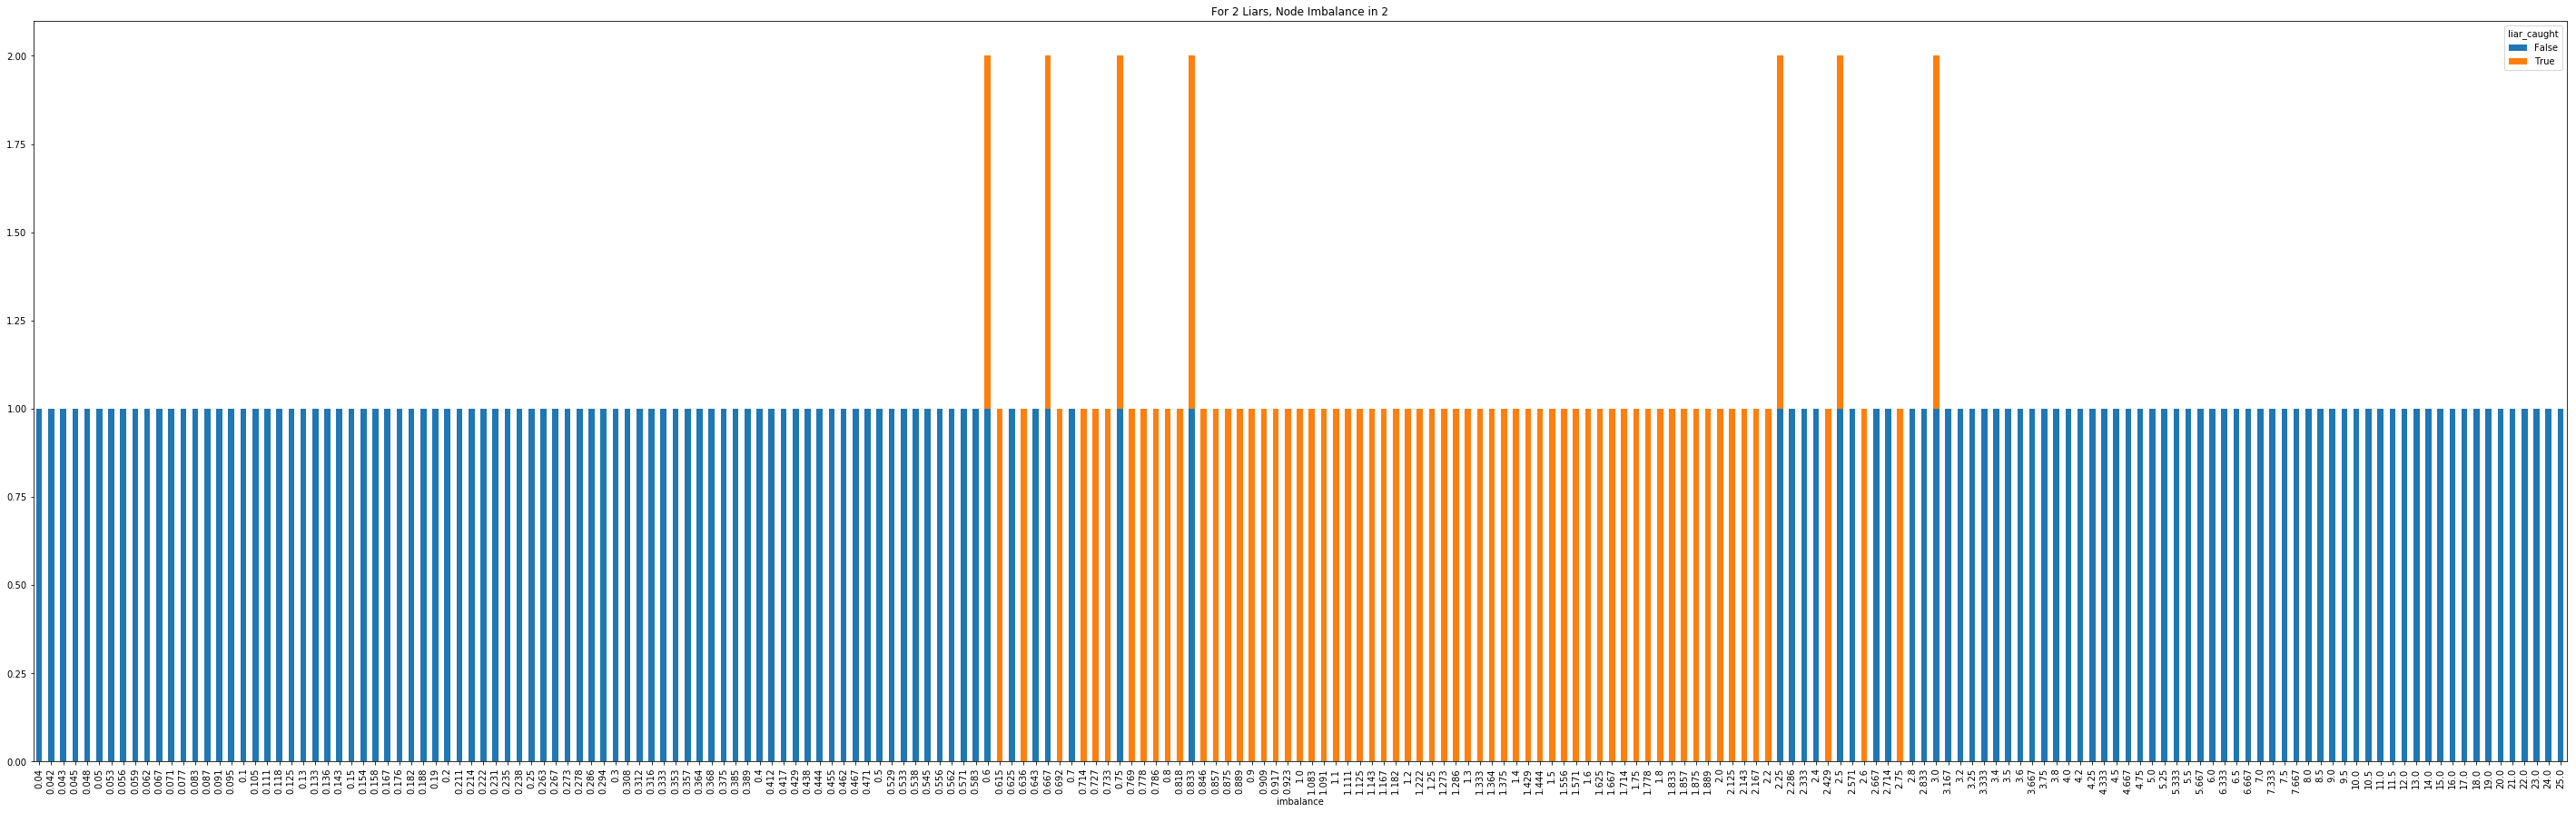

In [9]:
fig1, ax1 = plt.subplots(figsize=(50, 15))
data[["imbalance", "liar_caught"]].drop_duplicates()\
    .groupby(["imbalance", "liar_caught"]).size().unstack(fill_value=0).reset_index()\
    .plot.bar(stacked=True, ax=ax1, x="imbalance",  
              title="For "+str(nbLiars)+" Liars, Node Imbalance in "+str(nbClusters))

In [10]:
fig1.savefig('graphs/cluster_ratios/'+filename+'_cluster_ratio.png')